**_Adventures in Data: Homicide_**
# Chapter 1: Data

## Version requirements


The project requires Python > 3.7.


## Introduction


Homicide is one of those things that's so far removed from most of our lives in Western countries that it's easy to sensationalize it to an absurd degree. Just look at all the detective shows (which I admit I enjoy) or serial killer docu-series available now. Nevertheless, the act of taking a human life is so _grotesque_ that there has to be some rhyme or reason to it (or so one hopes).

The practical implications of that existence (again, hopefully) of motive are in the actual solving of the case and arresting the perpetrators, and this is the thing I was originally interested in.

I used two datasets of homicide case data. The first was compiled by a team at [_The Washington Post_](https://github.com/washingtonpost/data-homicides) [1], covering 52,000 hommicides in 50 of the largest cities in the United States, from January 1, 2007 to December 31, 2017. The accompanying [story](https://www.washingtonpost.com/graphics/2018/investigations/where-murders-go-unsolved/) [2] focuses on the causes and impacts of unsolved homicides and the regions with low homicide arrest rates. The second is from the [Murder Accountability Project](https://www.murderdata.org/p/data-docs.html) [3], dowloaded September 19, 2023, which covers over ten times as many homicides, from 1985 to the present.

The hope here was that combining the two datasets would lead to a clearer picture of homicide case closes and arrests than either dataset could provide individually. During the data prepping, however, I quickly encountered a challenge that piqued my interest; so, I followed my curiosity, and expanded this would-be small project into a series.

## Data provenance


The first, more detailed dataset was compiled by a team at _The Washington Post_ [1] using various sources, complete and partial. To avoid typing out the full name, I often refer to this dataset as simply the "_Post_" dataset throught the series.

The second dataset was compiled by the Murder Accountability Project (MAP) [3], using data from official FBI records as well as other sources accessed using the Freedom of Information Act. The Murder Accountability Project claims to have the most complete repository on US homicide data available anywhere, so I have high hopes for its utility.


## Preliminary imports


In this first chapter I'm only interested in exploring the "structural" characteristics of the two datasets, so we won't need anything fancy. `numpy` will supply some NaN values we can use to replace null data and `pandas` of course will be used to place the data into a DataFrame which can be manipulated and explored.

In [1]:
import numpy as np
import pandas as pd

## Import data


The data files were too large to upload to GitHub (I don't have Large File Storage), so I hope that just specifying where I acquired the data (above) will suffice.

Originally the _Washington Post_ data was downloaded as a CSV, but importing it as a CSV directly caused issues so I opened it in Excel and saved it in the XLSX format, which imports without issue.

Additionally, the `dtype` argument specifies that the data should be imported as the `object` type, which allows for all types of values in all columns.

The data columns will be formatted after some initial exploration.


In [2]:
post_df = pd.read_excel("./data/homicide-data.xlsx", dtype=object)

In [3]:
map_df = pd.read_csv("./data/SHR76_21.csv", dtype=object)

We will also enable an option to see all the columns of a DataFrame:


In [4]:
pd.set_option("display.max_columns", None)

## Data quality checks and preprocessing


### _Washington Post_ data


#### Data value exploration


In [5]:
post_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uid            52179 non-null  object
 1   reported_date  52179 non-null  object
 2   victim_last    52178 non-null  object
 3   victim_first   52179 non-null  object
 4   victim_race    52179 non-null  object
 5   victim_age     52179 non-null  object
 6   victim_sex     52179 non-null  object
 7   city           52179 non-null  object
 8   state          52179 non-null  object
 9   lat            52119 non-null  object
 10  lon            52119 non-null  object
 11  disposition    52179 non-null  object
dtypes: object(12)
memory usage: 4.8+ MB


Looks like there are just over 52,000 entries.

A good way to see what values exist in a dataset, especially one that's been imported with the `object` `dtype`, is to examine random data samples. I prefer this to the usual method of calling the `head()` method on the DataFrame because it gets a range of values that may not be fully covered in the first few rows of the dataset.


In [6]:
post_df.sample(10)

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition
25146,Jac-000736,20130331,HICKS,WILLIAM,Black,32,Male,Jacksonville,FL,30.44433,-81.658364,Closed by arrest
9025,Chi-005085,20101111,AUGUST,DENNIS C,Black,25,Male,Chicago,IL,41.763618,-87.56538,Open/No arrest
5768,Bos-000367,20091223,CORRAO,JULIENNE,White,49,Female,Boston,MA,42.377336,-71.036022,Open/No arrest
37938,NY-000538,20170920,Unknown,Unknown,Black,58,Male,New York,NY,40.798964,-73.950314,Open/No arrest
15885,Dal-002402,20151222,Unknown,Unknown,Unknown,Unknown,Unknown,Dallas,TX,32.71088,-96.69997,Closed by arrest
27040,Las-000172,20080609,RIMER,JASON,White,4,Male,Las Vegas,NV,36.146227,-115.066844,Closed by arrest
37758,NY-000358,20170129,Unknown,Unknown,Asian,33,Male,New York,NY,40.74773,-73.986839,Closed by arrest
51439,Was-000630,20100528,HAGOS,ASSEFAW,Black,41,Male,Washington,DC,38.916622,-77.024275,Closed by arrest
17006,Det-000591,20150902,SAVORS,ED,Black,30,Male,Detroit,MI,42.37608,-83.199761,Closed by arrest
3871,Bal-700036,20170203,CHADWICK,TONJA,Black,20,Female,Baltimore,MD,39.329098,-76.567193,Closed by arrest


<span style="color: red">Note:</span> It's important not to make the sample size too large or run the `sample()` method too many times if you intend to do any kind of hypothesis testing. Ideally, one would be able to access mutiple datasets from the same source, perform data analysis on one and generate hypotheses to test, and use the others for testing those hypotheses, with one dataset per hypothesis, to avoid the multiple-comparisons problem. Fortunately, this project will not require any hypothesis testing, so we can get as familiar with the data as we want. We will split it into train and test sections in the future, however, to build and tune machine-learning models.

Conveniently, it looks likely that null values are specified as `Unknown` all throughout the dataset.


#### Cleaning and transformation


This function was written iteratively; I didn't know ahead of time which columns would transform easily into another `dtype`, so it took some trial and error.

Note that it adds some columns, to make analysis easier. For instance, the numeric `date` column is used to derive `month`, `weekday`, and `delta_days` (number of days between the incident report date and the latest date) columns.

We'll have to import the `datetime` package to gain access to datetime processing and transformation functions, and then we can go about cleaning the data:

In [7]:
import datetime as dt

In [8]:
def transform_post_dataframe (data):
    
    # Avoid accidentally overriding the original
    transformed_df = data.copy()
    
    transformed_df["reported_date"] = pd.to_datetime(transformed_df["reported_date"].map(lambda d: f"{str(d)[:4]}-{str(d)[4:6]}-{str(d)[-2:]}"))
    max_date = transformed_df["reported_date"].max()
    transformed_df["year"] = transformed_df["reported_date"].dt.year.astype(int)
    transformed_df["month"] = transformed_df["reported_date"].dt.month_name().astype("category")
    transformed_df["weekday"] = transformed_df["reported_date"].dt.day_name().astype("category")
    # How long has it been since the case was opened?
    transformed_df["delta_days"] = ((max_date - transformed_df["reported_date"]).dt.total_seconds() / (60 * 60 * 24)).astype(int)
    
    transformed_df["victim_race"] = transformed_df["victim_race"].astype("category")
    transformed_df["victim_age"] = transformed_df["victim_age"].map(lambda s: np.nan if not str(s).isnumeric() else int(s)).astype(pd.Int8Dtype())
    transformed_df["victim_sex"] = transformed_df["victim_sex"].astype("category")
    transformed_df["city"] = transformed_df["city"].astype("category")
    transformed_df["state"] = transformed_df["state"].astype("category")
    
    transformed_df["lat"] = transformed_df["lat"].astype(float)
    transformed_df["lon"] = transformed_df["lon"].astype(float)
    
    transformed_df["disposition"] = transformed_df["disposition"].astype("category")
    
    return transformed_df

In [9]:
post_data = transform_post_dataframe(post_df)

In [10]:
post_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   uid            52179 non-null  object        
 1   reported_date  52179 non-null  datetime64[ns]
 2   victim_last    52178 non-null  object        
 3   victim_first   52179 non-null  object        
 4   victim_race    52179 non-null  category      
 5   victim_age     49180 non-null  Int8          
 6   victim_sex     52179 non-null  category      
 7   city           52179 non-null  category      
 8   state          52179 non-null  category      
 9   lat            52119 non-null  float64       
 10  lon            52119 non-null  float64       
 11  disposition    52179 non-null  category      
 12  year           52179 non-null  int32         
 13  month          52179 non-null  category      
 14  weekday        52179 non-null  category      
 15  delta_days     5217

array([[<Axes: title={'center': 'reported_date'}>,
        <Axes: title={'center': 'victim_age'}>],
       [<Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lon'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'delta_days'}>]], dtype=object)

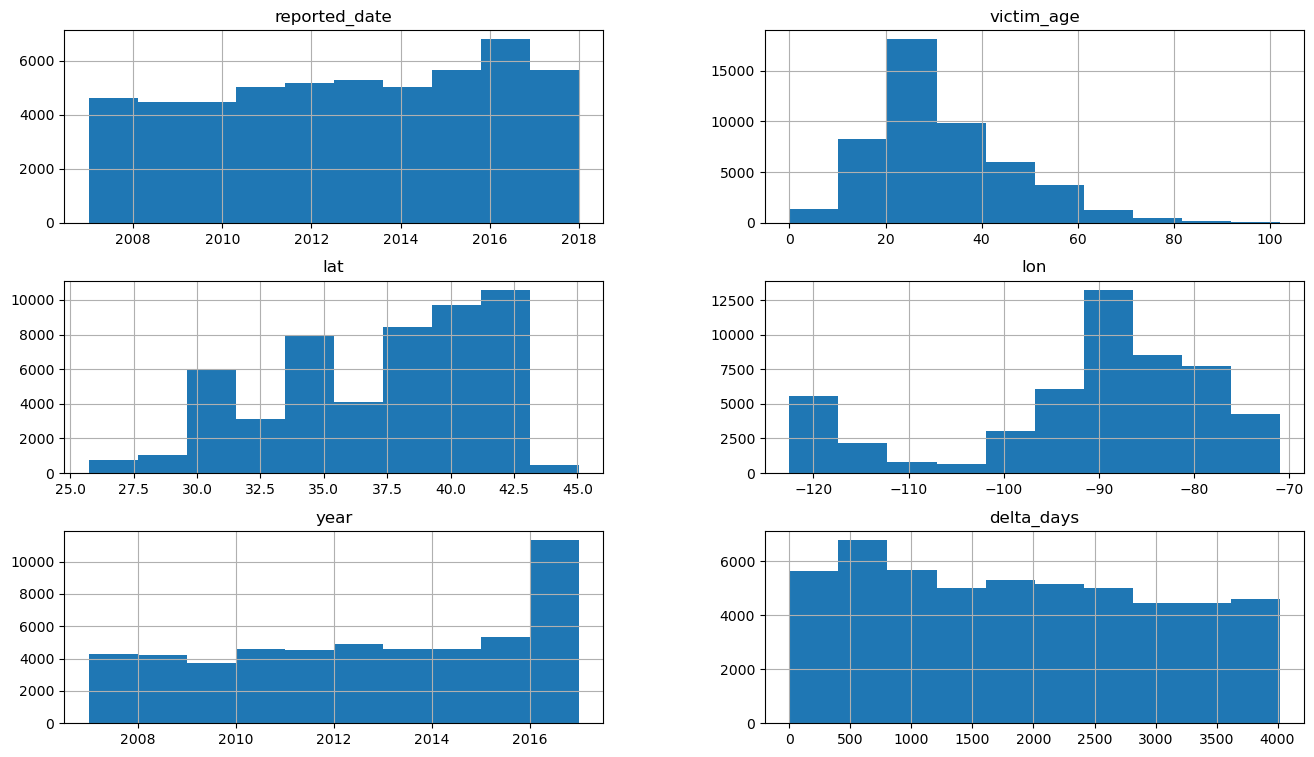

In [11]:
post_data.hist(figsize=(16, 9))

All seems to be in working order. There are null values, but that's not a problem since I'm only analyzing the data and not building any machine learning models (yet). I'll locally save the cleaned data in a CSV file move on to the Murder Accountability Project dataset:

In [12]:
post_data.to_csv("./data/post-data.csv")

### Murder Accountability Project Data


#### Data value exploration


In [13]:
map_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849144 entries, 0 to 849143
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            849144 non-null  object
 1   CNTYFIPS      849144 non-null  object
 2   Ori           849144 non-null  object
 3   State         849144 non-null  object
 4   Agency        849144 non-null  object
 5   Agentype      849144 non-null  object
 6   Source        849144 non-null  object
 7   Solved        849144 non-null  object
 8   Year          849144 non-null  object
 9   StateName     849144 non-null  object
 10  Month         849144 non-null  object
 11  Incident      849144 non-null  object
 12  ActionType    849144 non-null  object
 13  Homicide      849144 non-null  object
 14  Situation     849144 non-null  object
 15  VicAge        849144 non-null  object
 16  VicSex        849144 non-null  object
 17  VicRace       849144 non-null  object
 18  VicEthnic     849144 non

In [14]:
map_df.sample(10)

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
296896,199012006NY01401,"Erie, NY",NY01401,New York,Buffalo,Municipal police,FBI,No,1990,,December,6,Adjustment,Murder or Non-negligent manslaughter,Single victim/unknown offender(s),80,Male,Black,Unknown or not reported,999,Unknown,Unknown,Unknown or not reported,"Blunt object - hammer, club, etc",Relationship not determined,Robbery,,0,0,040491,"Buffalo-Niagara Falls, NY"
452681,199803001TX11602,"Hunt, TX",TX11602,Texas,Commerce,Municipal police,FBI,Yes,1998,,March,1,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,28,Male,White,Hispanic Origin,43,Male,White,Hispanic Origin,Knife or cutting instrument,Acquaintance,Other arguments,,0,0,080498,"Dallas-Fort Worth-Arlington, TX"
603644,200707010TXHPD00,"Harris, TX",TXHPD00,Texas,Houston,Municipal police,FBI,Yes,2007,,July,10,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,27,Male,Black,Not of Hispanic Origin,34,Male,Black,Not of Hispanic Origin,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,,0,0,122007,"Houston-Sugar Land-Baytown, TX"
192867,198509001MA309SP,"Middlesex, MA",MA309SP,Massachusetts,State Police: Middlesex County,Primary state LE,FBI,Yes,1985,,September,1,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,30,Female,White,Not of Hispanic Origin,40,Male,Black,Not of Hispanic Origin,Knife or cutting instrument,Acquaintance,Narcotic drug laws,,0,0,022586,"Boston-Cambridge-Quincy, MA-NH"
1037,197601006MA01301,"Suffolk, MA",MA01301,Massachusetts,Boston,Municipal police,FBI,Yes,1976,,January,6,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,35,Male,Black,Unknown or not reported,26,Male,Black,Unknown or not reported,Rifle,Acquaintance,Other arguments,,0,0,030180,"Boston-Cambridge-Quincy, MA-NH"
102907,198102001CO02101,"El Paso, CO",CO02101,Colorado,Colorado Springs,Municipal police,FBI,No,1981,,February,1,Normal update,Murder or Non-negligent manslaughter,Single victim/unknown offender(s),26,Male,White,Unknown or not reported,999,Unknown,Unknown,Unknown or not reported,Knife or cutting instrument,Relationship not determined,Circumstances undetermined,,0,0,073081,"Colorado Springs, CO"
810742,202004001SC04100,"Saluda, SC",SC04100,South Carolina,Saluda County,Sheriff,FBI,Yes,2020,SOUTH,April,1,Normal update,Manslaughter by negligence,Single victim/multiple offenders,28,Male,White,Not of Hispanic Origin,37,Female,White,Not of Hispanic Origin,"Narcotics or drugs, sleeping pills",Boyfriend,All other manslaughter by negligence,,0,2,083121,"Columbia, SC"
474480,199908001VA12200,"Richmond, VA",VA12200,Virginia,Richmond,Municipal police,FBI,Yes,1999,,August,1,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,17,Male,Black,Unknown or not reported,17,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other,,0,0,111099,"Richmond, VA"
255209,198812001NC01400,"Caldwell, NC",NC01400,North Carolina,Caldwell County,Sheriff,FBI,Yes,1988,,December,1,Normal update,Murder or Non-negligent manslaughter,Single victim/single offender,25,Male,White,Unknown or not reported,18,Male,Black,Unknown or not reported,Rifle,Acquaintance,Other arguments,,0,0,032389,"Hickory-Lenoir-Morganton, NC"
827985,202101005MDBPD00,"Baltimore city, MD",MDBPD00,Maryland,Baltimore,Municipal police,MAP,No,2021,MARYLA,January,5,Normal update,Murder or Non-negligent manslaughter,Single victim/unknown offender(s),21,Male,Black,Not of Hispanic Origin,999,Unknown,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,,0,0,122922,"Baltimore-Towson, MD"


The MAP dataset has more than ten times the number of data points as the _Washington Post_ dataset, and different columns. It does not contain the victim's names, though it does have information about the perpetrators, which the _Post_ dataset does not.

Much like the _Post_ dataset, the MAP dataset specifies unknown categorical values with the `Unknown` value. Unknown numerical data, however, are recorded differently.


#### Cleaning and transformation


Cleaning the MAP data was not as straightforward as cleaning the _Post_ data, so I decided to show more of the process of building its transformation function.

First, I found that the lengths of the datestrings were inconsistent. Most had six characters, which was good since those records adhered to a consistent datestring format, but some had four or five, and the remainder were empty.

So, I went about replacing the short datestrings with longer ones so that I could convert the dates to the `datetime` type in one go later.

In [15]:
short_datestring_records = map_df[map_df["FileDate"].map(lambda d: 0 < len(d.strip()) < 6)][["ID", "FileDate"]]

In [16]:
short_datestring_records

,ID,FileDate
827265,202101001CA03700,10121
827966,202101005CA03711,10121
827971,202101005FL05901,1321
828009,202101006CA03711,10121
828045,202101007CA03711,10121
...,...,...
848175,202112451FL04800,12321
848177,202112452FL04800,12821
848189,202112497FL04804,12421
848201,202112556FL05000,12121


2,560 rows is less than 1% of the total number of records in the MAP dataset, which is not bad (this isn't the total number of invalid dates; since I'm only extracting datestrings I can change, I ignored all datestrings that are empty). Still, ideally all dates would be recorded accurately and in the same format, so I still think it's worth taking some time to clean them up.

First, note that the [MAP data dictionary](https://www.dropbox.com/s/lo6tgo8nnbpqeru/MAPdefinitionsSHR.pdf) [4] specifies the datestrings as having the format "mmddyy"; that is, the first two characters represent the month, the middle two represent the day, and the last two represent the year. However, not all the datetsrings have six characters, and in my effort to clean them up, I made two assumptions:

1. That the last two characters always represents the year; and
2. That the month always precedes the day.

The `correct_datestrings()` function below is pretty simple: if the datestring has four characters, it assumes that the first two represent the month and day, and the last two represent the year (e.g. "4620" is April 6, 2020).

If, on the other hand, the datestring has five characters, things are a bit more complicated. For instance, the datestring "12417" could be corrected to either "012417" (January 24, 2017) or "120417" (December 4, 2017).

I think the most accurate way to figure out what the correct date is to compare the dates in records above and below the record in question. However, even that isn't foolproof: the dates represented by the datestrings I'm correcting are the record file dates, which are updated when a change (or `Adjustment`, as recorded in the `ActionType` column) is made to the record. So, if a record is preceded by a case which was filed on January 23, 2017 and succeeded by a case filed January 25, 2017, the record could have a file date of December 4, 2017 if it was adjusted on that day.

So why not simply check the `ActionType` column of the record to see if it was adjusted? Well, an adjustment could also have been made the same day the record was filed, so deciding on an interpretation of a datestring based _purely_ on that would result in an incorrect date.

Also, I'm not sure that only the `Adjustment` value of `ActionType` corresponds to a change in the record, because the data dictionary doesn't tell us what counts as a "normal" update and what counts as an adjustment.

To solve the five-character-datestring problem I used a combination of checks, in a series of if-elif-else statements. Here's the logic behind them:

First, take the datestring "50216". Obviously, "50" can't be the month number since there are only twelve of those, so the correct datestring must be "050216" --- May 2, 2016. This is one strategy I used to handle five-character datestrings: if the number formed by the first two characters exceeds 12, stick a zero at the front of it.

Next, all records in the MAP dataset have an ID, in which is encoded the year and month the record was initially filed, which can be used as a reference. For instance, a case with an ID like "202105045..." (the 45th incident in May, 2021) can't have the datestring "11221" be corrected to "011221" (January 12, 2021) since a record can't have been filed ... before it was filed. So, I know to correct "11221" to "110221" (November 2, 2021).

All other datestrings I replaced with a " ", since there is no purely logical way to verify which date they correspond to. For example, take ID "202101..." and datestring "10121". Even the `ActionType` doesn't tell me much, since the MAP data dictionary doesn't specify what, exactly, counts as a "normal" update and what counts as an adjustment.

In [17]:
def correct_datestrings (data):
    
    transformed_df = data.copy()
    
    for i in transformed_df.index:
        
        date_string = transformed_df.loc[i, "FileDate"].strip()
        month_string = transformed_df.loc[i, "ID"].strip()[4:6]
        
        # Trivial case
        if len(date_string) < 4:
            transformed_df.loc[i, "FileDate"] = " "
        # Easiest nontrivial case
        elif len(date_string) == 4:
            transformed_df.loc[i, "FileDate"] = "0" + date_string[0] + "0" + date_string[1:]
        # The month obviously can't exceed 12, so there must be a "0" in the beginning; covers dates 30 and 31.
        elif int(date_string[:2]) > 12:
            transformed_df.loc[i, "FileDate"] = "0" + date_string
        # File month can't be less than record creation month
        elif int("0" + date_string[0]) < int(month_string):
            transformed_df.loc[i, "FileDate"] = date_string[0:2] + "0" + date_string[2:]
        else:
            transformed_df.loc[i, "FileDate"] = " "
    
    return transformed_df

In [18]:
corrected_datestrings = correct_datestrings(short_datestring_records)

In [19]:
corrected_datestrings[corrected_datestrings["FileDate"].map(lambda d: len(d) < 6)]

,ID,FileDate
827265,202101001CA03700,
827966,202101005CA03711,
828009,202101006CA03711,
828045,202101007CA03711,
828233,202101014CA00107,
...,...,...
828998,202101920CA03711,
829000,202101986CA03801,
829001,202101987CA03801,
829002,202101988CA03801,


Looks like that took care of almost all non-standard datestrings. Only 274 remain which are not six characters long. This is

In [20]:
274 / len(short_datestring_records)

0.10703125

or just over a tenth of all nonstandard datestrings which remain uncorrected. Before replacing the ones in the main DataFrame, though, let's check the distribution of these dates and see that they make sense:

<Axes: xlabel='FileDate'>

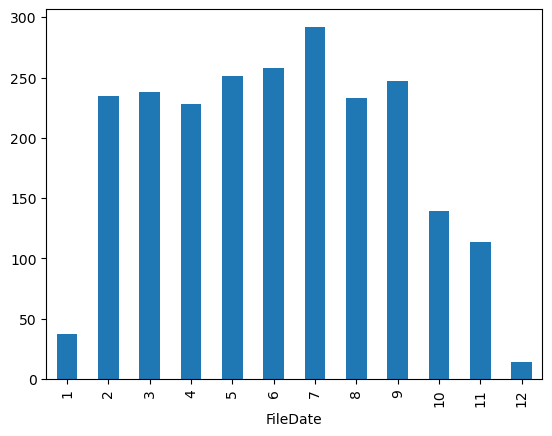

In [21]:
pd.to_datetime(corrected_datestrings[corrected_datestrings["FileDate"].map(lambda d: len(d) == 6)]["FileDate"], format="%m%d%y").dt.month.value_counts().sort_index().plot.bar()

Looks like homicide reports peak in summer months and are at a minimum in January and December, which makes sense: in addition to people being more confrontational in hot weather and just generally being out more, I suspect the holiday rush in January and December probably causes some administration delays.

I'm okay replacing the nonstandard datestrings in the main DataFrame with the corrected ones now. To do so, I'll get a list of the indices of the datestrings I corrected:

In [22]:
indices_to_replace = corrected_datestrings.index

Now I can replace the datestrings in the main DataFrame with the new ones based on those indices:

In [23]:
map_df.loc[indices_to_replace]["FileDate"] = corrected_datestrings.loc[indices_to_replace]["FileDate"]

Let's see how many nonstandard datestrings now remain in the main DataFrame:

In [24]:
map_df["FileDate"].map(lambda d: len(d.strip()) < 6).mean()

0.021325004946157543

Fewer than 2% of the records don't have a valid `FileDate`, which I think is pretty good (for now).

Next, the `State` column lists the full name of the state rather than the two-letter abbreviation as the _Post_ data does, so I created this dictionary to make conversion easier (again, this was an iterative process, and I modified code as I encountered and fixed errors and warnings):

In [25]:
state_abbreviations = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AK",
    "American Samoa": "AS",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "District of Columbia": "DC",
    "Florida": "FL",
    "Georgia": "GA",
    "Guam": "GU",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Northern Mariana Islands": "MP",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Oregan": "OR",         # There is an "Oregan" entry in the DataFrame
    "Pennsylvania": "PA",
    "Puerto Rico": "PR",
    "Rhode Island": "RI",
    "Rhodes Island": "RI",  # There is a "Rhodes Island" entry in the DataFrame
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Trust Territories": "TT",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}

That done, here is the final transformation/cleaning function. Note that I have renamed many of the columns to make them easier to work with.

In [28]:
def transform_map_dataframe (data):
    
    # Avoid accidentally overriding the original
    transformed_df = pd.DataFrame()
    
    transformed_df["ID"] = data["ID"]
    
    transformed_df["Agency Code"] = data["Ori"].astype("category")
    transformed_df["Agency Name"] = data["Agency"].astype("category")
    transformed_df["Agency Type"] = data["Agentype"].astype("category")
    
    transformed_df["City"] = data["CNTYFIPS"].map(lambda s: s.split(",")[0]).astype("category")
    transformed_df["MSA"] = data["MSA"].map(lambda s: s.split(",")[0]).astype("category")
    transformed_df["State"] = data["State"].map(lambda s: state_abbreviations[s]).astype("category")
    
    transformed_df["Date"] = pd.to_datetime(data["FileDate"].map(lambda d: dt.datetime.strptime(d, "%m%d%y") if len(d.strip()) == 6 else np.datetime64("NaT")))
    transformed_df["Year"] = transformed_df["Date"].dt.year.astype(np.int16, errors="ignore")
    transformed_df["Month"] = transformed_df["Date"].dt.month_name().astype("category")
    transformed_df["Weekday"] = transformed_df["Date"].dt.day_name().astype("category")
    
    max_report_date = transformed_df["Date"].max()
    transformed_df["Delta Days"] = ((max_report_date - transformed_df["Date"]).dt.total_seconds() / (60 * 60 * 24)).astype(pd.Int16Dtype())
    
    transformed_df["Occurrence Year"] = data["Year"].astype(int)
    transformed_df["Occurrence Month"] = data["Month"].astype("category")
    
    transformed_df["Incident"] = data["Incident"].astype(int)
    transformed_df["Crime Type"] = data["Homicide"].astype("category")
    transformed_df["Situation"] = data["Situation"].astype("category")
    
    transformed_df["Action"] = data["ActionType"].astype("category")
    
    transformed_df["Solved"] = data["Solved"].map(lambda s: True if s == "Yes" else False).astype(bool)
    
    transformed_df["Victim Sex"] = data["VicSex"].astype("category")
    # According to the MAP docs, an age value of 998 indicates an unknown age
    transformed_df["Victim Age"] = data["VicAge"].map(lambda s: np.nan if not s.isnumeric() or int(s) > 900 else int(s)).astype(pd.Int8Dtype())
    transformed_df["Victim Race"] = data["VicRace"].astype("category")
    transformed_df["Victim Ethnicity"] = data["VicEthnic"].astype("category")
    
    transformed_df["Offender Sex"] = data["OffSex"].astype("category")
    # According to the MAP docs, an age value of 998 indicates an unknown age
    transformed_df["Offender Age"] = data["OffAge"].map(lambda s: np.nan if not s.isnumeric() or int(s) > 900 else int(s)).astype(pd.Int8Dtype())
    transformed_df["Offender Race"] = data["OffRace"].astype("category")
    transformed_df["Offender Ethnicity"] = data["OffEthnic"].astype("category")
    
    transformed_df["Weapon"] = data["Weapon"].astype("category")
    transformed_df["Relationship"] = data["Relationship"].astype("category")
    
    transformed_df["Circumstance"] = data["Circumstance"].astype("category")
    transformed_df["Sub Circumstance"] = data["Subcircum"].astype("category")
    
    transformed_df["Victim Count"] = data["VicCount"].astype(int)
    transformed_df["Offender Count"] = data["OffCount"].astype(int)
    
    transformed_df["Source"] = data["Source"].astype("category")
    
    return transformed_df

In [29]:
map_data = transform_map_dataframe(map_df)

In [30]:
map_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849144 entries, 0 to 849143
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ID                  849144 non-null  object        
 1   Agency Code         849144 non-null  category      
 2   Agency Name         849144 non-null  category      
 3   Agency Type         849144 non-null  category      
 4   City                849144 non-null  category      
 5   MSA                 849144 non-null  category      
 6   State               849144 non-null  category      
 7   Date                831036 non-null  datetime64[ns]
 8   Year                831036 non-null  float64       
 9   Month               831036 non-null  category      
 10  Weekday             831036 non-null  category      
 11  Delta Days          831036 non-null  Int16         
 12  Occurrence Year     849144 non-null  int32         
 13  Occurrence Month    849144 no

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Delta Days'}>],
       [<Axes: title={'center': 'Occurrence Year'}>,
        <Axes: title={'center': 'Incident'}>,
        <Axes: title={'center': 'Victim Age'}>],
       [<Axes: title={'center': 'Offender Age'}>,
        <Axes: title={'center': 'Victim Count'}>,
        <Axes: title={'center': 'Offender Count'}>]], dtype=object)

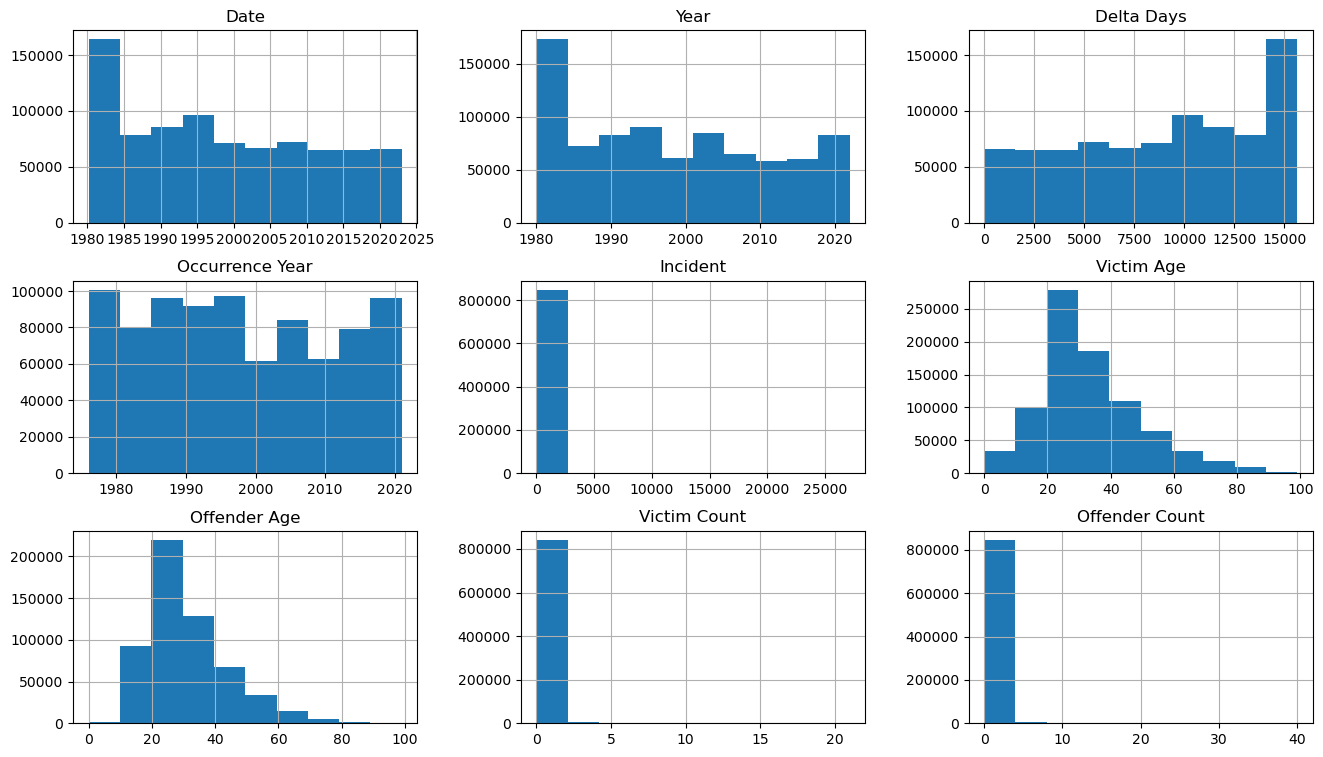

In [31]:
map_data.hist(figsize=(16, 9))

Interestingly, the report dates start on March 1, 1980 despite homicide occurrences being recorded in the late 1970s:

In [32]:
map_data["Occurrence Year"].min()

1976

In [33]:
map_data["Date"].min()

Timestamp('1980-03-01 00:00:00')

Initially I thought this was because the FBI didn't start collecting homicide records until that date, but I could find no evidence to support this idea anywhere; indeed, there appear to be no events of significance related to homicide incident recording that occur on or around March 1, 1980.

Moreover, the criminal incident records filed in 1980 correspond almost entirely to numerous homicides from 1976 to 1979, and hardly any from 1980:

<Axes: xlabel='Occurrence Year'>

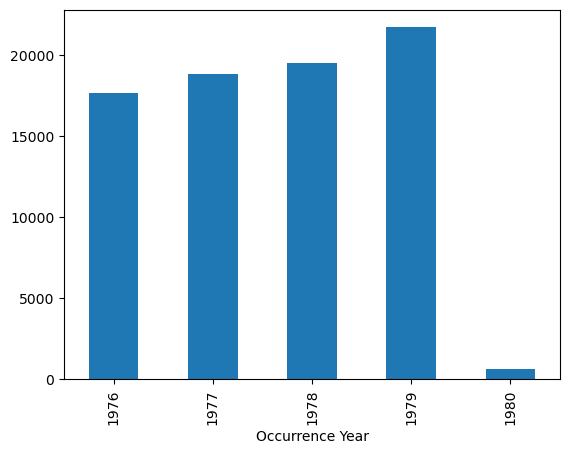

In [34]:
map_data[map_data["Year"] == 1980]["Occurrence Year"].value_counts().sort_index().plot.bar()

My instinct was that this kind of makes sense, since an incident has to have occurred before a report can be filed, but this looks like a pretty big discrepancy. That chart makes it look like there were over tenfold as many homicides in 1976 to 1979 each as there were in 1980. So, let's see how much difference there is between occurrence year and reported year over the whole MAP dataset:

In [35]:
reported_occurrence_year_diffs = map_data["Year"] - map_data["Occurrence Year"]

In [36]:
reported_occurrence_year_diffs.describe()

count    831036.000000
mean          0.903335
std           0.933962
min          -6.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          25.000000
dtype: float64

Okay, that's odd. Since the date the report is filed has to be after the date of the actual incident, the minimum difference should be `0`, not `-6`. Let's see which cases have a report year that occurs before the occurrence year:

In [37]:
map_data[map_data["Year"] < map_data["Occurrence Year"]]

,ID,Agency Code,Agency Name,Agency Type,City,MSA,State,Date,Year,Month,Weekday,Delta Days,Occurrence Year,Occurrence Month,Incident,Crime Type,Situation,Action,Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Offender Sex,Offender Age,Offender Race,Offender Ethnicity,Weapon,Relationship,Circumstance,Sub Circumstance,Victim Count,Offender Count,Source
511997,200201108DCMPD00,DCMPD00,Washington,Municipal police,District of Columbia,Washington-Arlington-Alexandria,DC,2001-03-01,2001.0,March,Thursday,7973,2002,January,108,Murder or Non-negligent manslaughter,Single victim/unknown offender(s),Normal update,False,Male,15,Black,Not of Hispanic Origin,Unknown,<NA>,Unknown,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,,0,0,MAP
511998,200201109DCMPD00,DCMPD00,Washington,Municipal police,District of Columbia,Washington-Arlington-Alexandria,DC,2001-03-01,2001.0,March,Thursday,7973,2002,January,109,Murder or Non-negligent manslaughter,Single victim/unknown offender(s),Normal update,False,Male,18,Black,Not of Hispanic Origin,Unknown,<NA>,Unknown,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,,0,0,MAP
511999,200201110DCMPD00,DCMPD00,Washington,Municipal police,District of Columbia,Washington-Arlington-Alexandria,DC,2001-03-01,2001.0,March,Thursday,7973,2002,January,110,Murder or Non-negligent manslaughter,Single victim/single offender,Normal update,True,Male,18,Black,Not of Hispanic Origin,Male,28,Black,Not of Hispanic Origin,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,,0,0,MAP
512000,200201111DCMPD00,DCMPD00,Washington,Municipal police,District of Columbia,Washington-Arlington-Alexandria,DC,2001-03-01,2001.0,March,Thursday,7973,2002,January,111,Murder or Non-negligent manslaughter,Single victim/multiple offenders,Normal update,True,Male,18,Black,Not of Hispanic Origin,Male,20,Black,Not of Hispanic Origin,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,,0,1,MAP
512001,200201112DCMPD00,DCMPD00,Washington,Municipal police,District of Columbia,Washington-Arlington-Alexandria,DC,2001-03-01,2001.0,March,Thursday,7973,2002,January,112,Murder or Non-negligent manslaughter,Single victim/single offender,Normal update,True,Male,22,Black,Not of Hispanic Origin,Male,23,Black,Not of Hispanic Origin,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,,0,0,MAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611218,200712516DCMPD00,DCMPD00,Washington,Municipal police,District of Columbia,Washington-Arlington-Alexandria,DC,2001-03-01,2001.0,March,Thursday,7973,2007,December,516,Murder or Non-negligent manslaughter,Single victim/single offender,Normal update,True,Male,26,Black,Not of Hispanic Origin,Male,<NA>,Black,Not of Hispanic Origin,Knife or cutting instrument,Relationship not determined,Circumstances undetermined,,0,0,MAP
611219,200712517DCMPD00,DCMPD00,Washington,Municipal police,District of Columbia,Washington-Arlington-Alexandria,DC,2001-03-01,2001.0,March,Thursday,7973,2007,December,517,Murder or Non-negligent manslaughter,Single victim/unknown offender(s),Normal update,False,Male,33,Black,Not of Hispanic Origin,Unknown,<NA>,Unknown,Unknown or not reported,"Firearm, type not stated",Relationship not determined,Circumstances undetermined,,0,0,MAP
611220,200712518DCMPD00,DCMPD00,Washington,Municipal police,District of Columbia,Washington-Arlington-Alexandria,DC,2001-03-01,2001.0,March,Thursday,7973,2007,December,518,Murder or Non-negligent manslaughter,Single victim/unknown offender(s),Normal update,False,Male,35,White,Hispanic Origin,Unknown,<NA>,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Circumstances undetermined,,0,0,MAP
611221,200712519DCMPD00,DCMPD00,Washington,Municipal police,District of C

Fascinating. Looks like the report filing date is March 1, 2001 for all of these:

In [38]:
map_data[map_data["Year"] < map_data["Occurrence Year"]]["Date"].value_counts()

Date
2001-03-01    1209
Name: count, dtype: int64

They are also all from Washington:

In [39]:
map_data[map_data["Year"] < map_data["Occurrence Year"]]["City"].unique()

['District of Columbia']
Categories (1798, object): ['Abbeville', 'Acadia', 'Accomack', 'Ada', ..., 'Yukon-Koyukuk', 'Yuma', 'Zapata', 'Zavala']

This is something I'd like to investigate further during the analysis phase; for now, it's good enough to have all the data filled in and in the right format.

There's one more thing I want to look at: the `Offender Age` column.

In the initial version of this chapter, I used an outdated MAP dataset that went up to 2014. In that dataset, the number `0` appeared to be used as a placeholder for unknown or not reported offender age, in addition to the usual value of `998`. This latest dataset, which covers incidents up to 2021, doesn't appear to have that problem:

<Axes: >

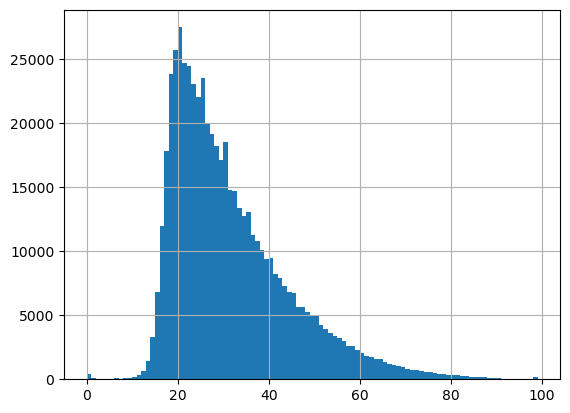

In [40]:
map_data["Offender Age"].hist(bins=99)

Marvelous. The recorded offender ages are much more consistent in this dataset. Also, we can see spikes at age values that are multiples of 5, probably occuring due to age estimates being rounded (e.g. "he was about 45 years old").

Much like the victims' ages, the perpetrators' ages are right-skewed.

There is a slight bump at the value `99`; according to the MAP data dictionary, a value of `99` represents the age being 99 _or older_. Normally this would be inconvenient, because this gives the data a categorical-like property, but in this case the number of data points with a `Perpetrator Age` of `99` is so small on the large scale that the bump in the distribution's tail can be put down to noise.

On the small scale, though, that "bump" becomes a skyscraper:

<Axes: >

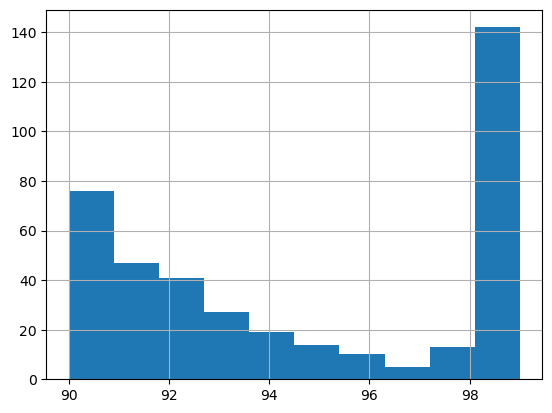

In [41]:
map_data[map_data["Offender Age"] >= 90]["Offender Age"].hist(bins = 10)

There is also a bump at the value `0`, which, though not the three-times-as-long bar it was in the version of the dataset I used before, is still concerning. I would like to investigate further.

<Axes: >

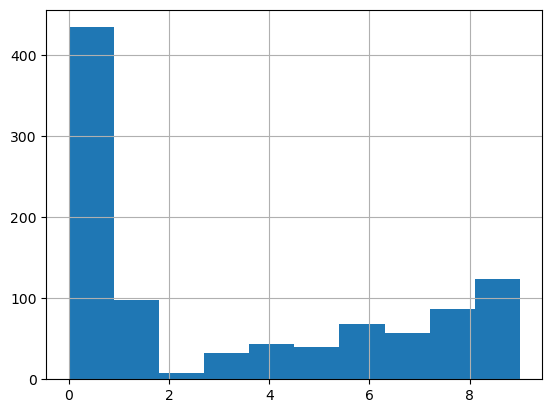

In [42]:
map_data[map_data["Offender Age"] < 10]["Offender Age"].hist(bins = 10)

There are is unsually large number of offenders recorded as being aged zero and one. Are we really to believe that a newborn is more likely to kill someone than a four-year-old? There is nothing in the MAP data dictionary [3] that suggests an answer, but this is something I'd like to explore further duirng the analysis phase.

A clustering algorithm might also help better understand the characteristics of cases which have `Offender Age` recorded as `0` or `1`.

For now, there are few enough cases like this that statistically I can safely pass it off as noise; the overall distribution of `Offender Age` is still fairly clear.

Finally, I saved the cleaned MAP data to a local CSV so I don't have to repeat these steps every time:

In [43]:
map_data.to_csv("./data/map-data.csv")

## Difficulty in combining the datasets


Both the _Washington Post_ data and the Murder Accountability Project data have been analyzed quite thoroughly by others. So, I wanted to combine these datasets, using the specific information in the _Post_ dataset to find the corresponding case in the MAP dataset and join the columns.

The trouble is that there is no guarantee the information is recorded the same (or at all) in the sources used to compile the _Post_ and MAP datasets. For example, just because a characteristic (e.g. age, sex, etc.) is recorded in one dataset does not mean it will be recorded in the other.

Finally, despite the MAP dataset being rather comprehensive, there isn't any guarantee that a case in the _Post_ dataset even _exists_ in the MAP dataset.

This means that there may be multiple or no MAP data points corresponding to each _Post_ data point, and so I can't just run a `pandas.merge()` on the two DataFrames and assume it will work.

Let's start by checking out the columns of each dataset and see which ones we can use to merge on:

In [44]:
print(post_data.columns)
print(map_data.columns)

Index(['uid', 'reported_date', 'victim_last', 'victim_first', 'victim_race',
       'victim_age', 'victim_sex', 'city', 'state', 'lat', 'lon',
       'disposition', 'year', 'month', 'weekday', 'delta_days'],
      dtype='object')
Index(['ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City', 'MSA',
       'State', 'Date', 'Year', 'Month', 'Weekday', 'Delta Days',
       'Occurrence Year', 'Occurrence Month', 'Incident', 'Crime Type',
       'Situation', 'Action', 'Solved', 'Victim Sex', 'Victim Age',
       'Victim Race', 'Victim Ethnicity', 'Offender Sex', 'Offender Age',
       'Offender Race', 'Offender Ethnicity', 'Weapon', 'Relationship',
       'Circumstance', 'Sub Circumstance', 'Victim Count', 'Offender Count',
       'Source'],
      dtype='object')


The city and state are the first filters I will apply to narrow things down.

After that, the case file date will narrow the time range.

Finally, information about the victim, including age, sex, and race should (under ideal circumstances, which never occur in reality because that would make life too easy) give me the exact case in the MAP data.

I suspect that data about the victim, as well as the year and month, are the most likely to be inconsistent in the two datasets, and geographic information most likely to be the same.

My reasoning is that information about the victim might not be known at the time the record was made by the agency from which the data was extracted in one dataset, but may have been known when the other dataset was compiled.

Additionally, the _Post_ dataset and MAP dataset use dates differently: the _Post_ dataset records the date the crime was reported, whereas the MAP dataset records the date _of the homicide or recovery of the body_. Those are not always the same.

For now, let's write a function that performs a simple inner-join on the two datasets based on all of the discussed factors, just to see what we get:

In [45]:
def simple_merge():

    map_cols = [ "City", "State", "Date", "Victim Sex", "Victim Race", "Victim Age" ]
    post_cols = [ "city", "state", "reported_date", "victim_sex", "victim_race", "victim_age" ]
    
    filtered_df = pd.merge(post_data, map_data, left_on = post_cols, right_on = map_cols)
    
    return filtered_df

In [46]:
simple_merged_data = simple_merge()

In [47]:
simple_merged_data

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,year,month,weekday,delta_days,ID,Agency Code,Agency Name,Agency Type,City,MSA,State,Date,Year,Month,Weekday,Delta Days,Occurrence Year,Occurrence Month,Incident,Crime Type,Situation,Action,Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Offender Sex,Offender Age,Offender Race,Offender Ethnicity,Weapon,Relationship,Circumstance,Sub Circumstance,Victim Count,Offender Count,Source
0,Bal-700097,2017-04-21,WILSON,DAVANTE,Black,25,Male,Baltimore,MD,39.370844,-76.591137,Closed by arrest,2017,April,Friday,254,201601004MD00301,MD00301,Baltimore County Police Department,County police,Baltimore,Baltimore-Towson,MD,2017-04-21,2017.0,April,Friday,2078,2016,January,4,Murder or Non-negligent manslaughter,Single victim/multiple offenders,Adjustment,True,Male,25,Black,Not of Hispanic Origin,Male,20,Black,Not of Hispanic Origin,"Handgun - pistol, revolver, etc",Acquaintance,Robbery,,0,1,FBI
1,Bal-700144,2017-05-30,BROWN,EVERETTE,Black,35,Male,Baltimore,MD,39.304259,-76.598341,Open/No arrest,2017,May,Tuesday,215,201607006MD00301,MD00301,Baltimore County Police Department,County police,Baltimore,Baltimore-Towson,MD,2017-05-30,2017.0,May,Tuesday,2039,2016,July,6,Murder or Non-negligent manslaughter,Single victim/multiple offenders,Adjustment,True,Male,35,Black,Unknown or not reported,Male,26,Black,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,,0,1,FBI
2,Los-000440,2011-07-05,Unknown,Unknown,Black,21,Male,Los Angeles,CA,33.968800,-118.291400,Open/No arrest,2011,July,Tuesday,2371,201101001CA01915,CA01915,Compton,Municipal police,Los Angeles,Los Angeles-Long Beach,CA,2011-07-05,2011.0,July,Tuesday,4195,2011,January,1,Murder or Non-negligent manslaughter,Single victim/unknown offender(s),Adjustment,False,Male,21,Black,Not of Hispanic Origin,Unknown,<NA>,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Juvenile gang killings,,0,0,FBI
3,Los-000496,2011-10-31,Unknown,Unknown,Black,29,Male,Los Angeles,CA,33.991600,-118.267400,Open/No arrest,2011,October,Monday,2253,201105014CA01942,CA01942,Los Angeles,Municipal police,Los Angeles,Los Angeles-Long Beach,CA,2011-10-31,2011.0,October,Monday,4077,2011,May,14,Murder or Non-negligent manslaughter,Single victim/multiple offenders,Adjustment,True,Male,29,Black,Not of Hispanic Origin,Male,32,Black,Not of Hispanic Origin,"Handgun - pistol, revolver, etc",Stranger,Juvenile gang killings,,0,1,FBI
4,Los-001293,2014-12-30,Unknown,Unknown,Black,20,Male,Los Angeles,CA,33.962700,-118.311200,Open/No arrest,2014,December,Tuesday,1097,201404001CA01977,CA01977,Carson,Municipal police,Los Angeles,Los Angeles-Long Beach,CA,2014-12-30,2014.0,December,Tuesday,2921,2014,April,1,Murder or Non-negligent manslaughter,Single victim/unknown offender(s),Adjustment,False,Male,20,Black,Not of Hispanic Origin,Unknown,<NA>,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Juvenile gang killings,,0,0,FBI
5,Los-001293,2014-12-30,Unknown,Unknown,Black,20,Male,Los Angeles,CA,33.962700,-118.311200,Open/No arrest,2014,December,Tuesday,1097,201411009CA01942,CA01942,Los Angeles,Municipal police,Los Angeles,Los Angeles-Long Beach,CA,2014-12-30,2014.0,December,Tuesday,2921,2014,November,9,Murder or Non-negligent manslaughter,Single victim/unknown offender(s),Adjustment,False,Male,20,Black,Not of Hispanic Origin,Unknown,<NA>,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Juvenile gang killings,,0,0,FBI
6,Los-001648,2015-11-18,Unknown,Unknown,Black,22,Male,Los Angeles,CA,33.957400,-118.256400,Open/No arrest,2015,November,Wednesday,774,201509005CA01941,CA01941,Long Beach,Municipal police,Los Angeles,Los Angeles-Long Beach,CA,2015-11-18,2015.0,November,Wednesday,2598,2015,September,5,Murder or Non-negligent manslaughter,Single victim/unknown offender(s),Adjustmen

It's easy to see which column came from which DataFrame based on the case of the first letter of the column name and whether words are separated by spaces or underscores.

There are only 55 records in which the city, state, report filing date, and victim characteristics in the _Post_ dataset correspond to at least one record in the MAP dataset, which is about a thousandth of the total number of cases in the _Post_ dataset.

Additionally, there are some duplicates, indicating that some cases in the _Post_ dataset correspond to multiple cases in the MAP dataset:

In [48]:
simple_merged_data["uid"].duplicated().sum()

14

In [49]:
len(simple_merged_data["uid"].unique())

42

In [50]:
simple_merged_data[simple_merged_data["uid"].duplicated()]

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,year,month,weekday,delta_days,ID,Agency Code,Agency Name,Agency Type,City,MSA,State,Date,Year,Month,Weekday,Delta Days,Occurrence Year,Occurrence Month,Incident,Crime Type,Situation,Action,Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Offender Sex,Offender Age,Offender Race,Offender Ethnicity,Weapon,Relationship,Circumstance,Sub Circumstance,Victim Count,Offender Count,Source
5,Los-001293,2014-12-30,Unknown,Unknown,Black,20,Male,Los Angeles,CA,33.962700,-118.311200,Open/No arrest,2014,December,Tuesday,1097,201411009CA01942,CA01942,Los Angeles,Municipal police,Los Angeles,Los Angeles-Long Beach,CA,2014-12-30,2014.0,December,Tuesday,2921,2014,November,9,Murder or Non-negligent manslaughter,Single victim/unknown offender(s),Adjustment,False,Male,20,Black,Not of Hispanic Origin,Unknown,<NA>,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Other - known to victim,Juvenile gang killings,,0,0,FBI
10,Phi-000188,2015-07-17,EPPS,DARIUS,Black,23,Male,Philadelphia,PA,39.944246,-75.226633,Closed by arrest,2015,July,Friday,898,201504005PAPEP00,PAPEP00,Philadelphia,Municipal police,Philadelphia,Philadelphia-Camden-Wilmington,PA,2015-07-17,2015.0,July,Friday,2722,2015,April,5,Murder or Non-negligent manslaughter,Single victim/single offender,Normal update,True,Male,23,Black,Not of Hispanic Origin,Male,20,Black,Not of Hispanic Origin,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,,0,0,FBI
20,Phi-001052,2008-06-30,MULLINS,STEVEN,Black,24,Male,Philadelphia,PA,39.989631,-75.163233,Closed by arrest,2008,June,Monday,3471,200804012PAPEP00,PAPEP00,Philadelphia,Municipal police,Philadelphia,Philadelphia-Camden-Wilmington,PA,2008-06-30,2008.0,June,Monday,5295,2008,April,12,Murder or Non-negligent manslaughter,Single victim/single offender,Normal update,True,Male,24,Black,Not of Hispanic Origin,Male,21,Black,Not of Hispanic Origin,"Handgun - pistol, revolver, etc",Other - known to victim,Other arguments,,0,0,FBI
22,Phi-001424,2009-01-06,BRADFORD,KHALIF,Black,21,Male,Philadelphia,PA,39.959047,-75.211088,Closed by arrest,2009,January,Tuesday,3281,200810012PAPEP00,PAPEP00,Philadelphia,Municipal police,Philadelphia,Philadelphia-Camden-Wilmington,PA,2009-01-06,2009.0,January,Tuesday,5105,2008,October,12,Murder or Non-negligent manslaughter,Single victim/single offender,Normal update,True,Male,21,Black,Not of Hispanic Origin,Male,20,Black,Not of Hispanic Origin,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,,0,0,FBI
23,Phi-001424,2009-01-06,BRADFORD,KHALIF,Black,21,Male,Philadelphia,PA,39.959047,-75.211088,Closed by arrest,2009,January,Tuesday,3281,200810015PAPEP00,PAPEP00,Philadelphia,Municipal police,Philadelphia,Philadelphia-Camden-Wilmington,PA,2009-01-06,2009.0,January,Tuesday,5105,2008,October,15,Murder or Non-negligent manslaughter,Single victim/unknown offender(s),Normal update,False,Male,21,Black,Not of Hispanic Origin,Unknown,<NA>,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,,0,0,FBI
28,Phi-004043,2008-06-30,WESTON,ARI,Black,19,Male,Philadelphia,PA,40.034626,-75.114981,Open/No arrest,2008,June,Monday,3471,200804021PAPEP00,PAPEP00,Philadelphia,Municipal police,Philadelphia,Philadelphia-Camden-Wilmington,PA,2008-06-30,2008.0,June,Monday,5295,2008,April,21,Murder or Non-negligent manslaughter,Single victim/single offender,Normal update,True,Male,19,Black,Not of Hispanic Origin,Male,26,Black,Not of Hispanic Origin,"Handgun - pistol, revolver, etc",Relationship not determined,Circumstances undetermined,,0,0,FBI
29,Phi-004043,2008-06-30,WESTON,ARI,Black,19,Male,Philadelphia,PA,40.034626,-75.114981,Open/No arrest,2008,June,Monday,3471,200804022PAPEP00,PAPEP00,Philadelphia,Municipal police,Philadelphia,Philadelphia-Camden-Wilmington,PA,2008-06-30,2008.0,June,Monday,5295,2008,April,22,Murder or Non-neglige

Of the 55 rows in the merged dataset, 42 are unique cases in the _Post_ dataset. Given that we used every possible commonality to merge the two datasets, this means that numerous cases in the _Post_ dataset correspond to more than one case in the MAP dataset. Interestingly, almost all the duplicates are cases in Philadelphia, and all are killings of young Black men, using a handgun.

There is one more thing to note: in the previous version of this project, the outdated MAP dataset I used didn't have a `File Date` column, so the `simple_merge()` function merged the datasets using the year and month of the report date in the _Post_ dataset and those of the occurrence date in the MAP dataset, and the resulting merged dataset had some 50,000 rows.

One case that existed in that dataset but does not occur in the `simple_merge`d dataset here is [the murder of Amanda Douglas](https://www.newson6.com/story/5e3625222f69d76f62048443/police:-tulsa-man-charged-with-double-murder-was-hired-killer) in November 2014 [5], which has a _Post_ dataset `uid` of `Tul-000655`. I want to see why no matches to this case's parameters showed up in the merged dataset:

In [51]:
simple_merged_data[simple_merged_data["uid"] == "Tul-000655"]

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,year,month,weekday,delta_days,ID,Agency Code,Agency Name,Agency Type,City,MSA,State,Date,Year,Month,Weekday,Delta Days,Occurrence Year,Occurrence Month,Incident,Crime Type,Situation,Action,Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Offender Sex,Offender Age,Offender Race,Offender Ethnicity,Weapon,Relationship,Circumstance,Sub Circumstance,Victim Count,Offender Count,Source


So, here's the case record in the _Post_ dataset:

In [52]:
post_data[post_data["uid"] == "Tul-000655"]

,uid,reported_date,victim_last,victim_first,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,year,month,weekday,delta_days
50705,Tul-000655,2014-11-26,DOUGLAS,AMANDA,White,26,Female,Tulsa,OK,36.100169,-95.851061,Closed by arrest,2014,November,Wednesday,1131


And here are all possible matches in the MAP dataset, using what we know about the Amanda Douglas case except the report date:

In [53]:
conditions = (map_data["Occurrence Year"] == 2014) & \
            (map_data["Occurrence Month"] == "November") & \
            (map_data["Victim Sex"] == "Female") & \
            (map_data["Victim Race"] == "White") & \
            (map_data["Victim Age"] == 26) & \
            (map_data["State"] == "OK") & \
            (map_data["City"] == "Tulsa")

map_data[conditions]

,ID,Agency Code,Agency Name,Agency Type,City,MSA,State,Date,Year,Month,Weekday,Delta Days,Occurrence Year,Occurrence Month,Incident,Crime Type,Situation,Action,Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Offender Sex,Offender Age,Offender Race,Offender Ethnicity,Weapon,Relationship,Circumstance,Sub Circumstance,Victim Count,Offender Count,Source
717312,201411102OK07205,OK07205,Tulsa,Municipal police,Tulsa,Tulsa,OK,2015-02-02,2015.0,February,Monday,2887,2014,November,102,Murder or Non-negligent manslaughter,Single victim/single offender,Adjustment,True,Female,26,White,Not of Hispanic Origin,Male,3,White,Not of Hispanic Origin,"Handgun - pistol, revolver, etc",Mother,Circumstances undetermined,,0,0,FBI
717315,201411103OK07205,OK07205,Tulsa,Municipal police,Tulsa,Tulsa,OK,2015-02-02,2015.0,February,Monday,2887,2014,November,103,Murder or Non-negligent manslaughter,Multiple victims/unknown offender(s),Adjustment,False,Female,26,White,Not of Hispanic Origin,Unknown,<NA>,Unknown,Unknown or not reported,"Handgun - pistol, revolver, etc",Relationship not determined,Other,,1,0,FBI


Much like in the previous version, there are two matches: the first is [the accidental killing of a 26-year-old woman by her three-year-old son](https://www.newson6.com/story/5e3629382f69d76f6204ae65/tulsa-police:-3yearold-accidentally-shot-killed-mother) [6], and the second is the murder of Amanda Douglas. Now we can see why neither of these showed up in the merged dataset: the `File Date` is different, and corresponds to an `Adjustment`, according to the `Action` column. Interestingly, Douglas' murder is still recorded as unsolved in the MAP dataset as of February 2, 2015, despite the man believed to have killed Douglas along with another woman, Jennifer Sanders, having been arrested in January 2015, according to the linked news story [5].

## Discussion


This is hardly an in-depth analysis, but looking into the _Post_ and MAP datasets and seeing their overlap was surprisingly informative and raised a few questions.

### Incompleteness

The discrepancy between the _Post_ data and the MAP data highlights the fact that even "complete" records need to be regularly updated based on official records, for instance, using the [FBI Crime Data Explorer](https://cde.ucr.cjis.gov) [7]. In a future project, I want to see if I can get data from the CDE to compare with the MAP dataset and/or update outdated information, like the fact that the record of the murder of Amanda Douglas was not updated as closed in the MAP dataset, despite the perpetrator having been arrested in 2015.

In addition, Carl Bialik published an [article](https://fivethirtyeight.com/features/how-to-make-sense-of-conflicting-confusing-and-misleading-crime-statistics/) [8] on FiveThirtyEight in January 2016 describing the inconsistent incident counting and reocrding practices among states and cities in the US, including how shootings are counted, and problems that can arise in the early days of the new year, when organizations report the previous year's crime totals. This may account for some of the missing file dates in the MAP dataset.

Similarly, a 2020 [article](https://www.pewresearch.org/short-reads/2020/11/20/facts-about-crime-in-the-u-s/) [9] written by John Gramlich at the Pew Research Center says that not every agency in the United States contributes homicide data to the FBI, so even the FBI CDE is likely to have incomplete data. This could explain some of the discrepancy between the _Post_ and MAP datasets: the _Post_ data was accessed "by hand," so to speak, so it may reference sources beyond FBI records, whereas the MAP dataset relies heavily on FBI records for its data.

This is not too relevant at this data cleaning stage, but will become extremely important in stages involving analysis of data.

It appears that the dataset compiled by the _Washington Post_ team is an anomaly; indeed, the GitHub page which hosts the dataset [1] indicates that the data came from a variety of sources, digital and analog. Compiling it all into one dataset must have taken an enormous amount of effort. It does, however, make one wonder what stands in the way of building a robust, consistent system of homicide (or any other crime) data collection, both on national and international levels, and what the social impacts of such a system would be.

### Canada


This project (and, indeed, the entire series of projects) focuses on homicide data from the United States rather than Canada, despite the fact that I am a Canadian citizen and not a citizen of the US; this is because no incident-based crime database exists in Canada.

From [Uniform Crime Reporting (UCR) survey page](https://www23.statcan.gc.ca/imdb/p2SV.pl?Function=getSurvey&SDDS=3302#a2) [10]:

> Statistics Canada is prohibited by law from releasing any data which would divulge information obtained under the Statistics Act that relates to any identifiable person, business or organization without the prior knowledge or the consent in writing of that person, business or organization. Various confidentiality rules are applied to all data that are released or published to prevent the publication or disclosure of any information deemed confidential. If necessary, data are suppressed to prevent direct or residual disclosure of identifiable data.
>
> More specifically, CCJCSS does not release any tables or cross-tabulations that may identify a particular victim or suspect by the specifics of an offence.

In general, Canadian privacy laws (specified in the [_Privacy Act_](https://laws-lois.justice.gc.ca/eng/acts/p-21/fulltext.html) [11]) strongly restrict the dispersal of information about specific individuals or which can be linked to specific individuals; since criminal incident information can be linked to individuals by means of media coverage and internet searches, as with Amanda Douglas above, my (admittedly limited) understanding is that no such government-maintained criminal incident database can exist in Canada without breaking federal law.

A dataset like the one compiled by _The Washington Post_ team, however, would probably be fine, using information collected from public records like news reports. No such dataset exists that I could find, however, so I stuck with US homicide data.


### Future work


As the title implies, this is only the first entry in a small series of projects dealing with homicide data. In future entries, I plan to:

1. Perform formal analyses on the _Washington Post_ and Murder Accountability Project datasets using statistical and machine learning methods;
2. Evaluate the efficacy of machine learning in the prediction of unknown information, like the missing dates;
3. Attempt building a local criminal incident data source using the FBI CDE API; and
4. Explore the questions raised here that can't be answered by analysis of the data using.

## Conclusion


This was originally meant to be a rudimentary data analysis project, but it turned out that there was so much to be learned just by comparing two datasets and following the thread of curiosity that it turned into an even more rudimentary project about data source and quality, which I think highlights quite well the fact that data, on its own, is not _inherently_ useful. Indeed, one might go as far as to say that data is only as useful as one's understanding of how it was collected.

## References


I'm still working on a reference and citation format for this series that's both understandable and easy to format, since it can tedious to format, say, the negative first-line indent of the APA and MLA formats using Markdown (this document is actually a Jupyter Notebook). The projects I'd like to work on should use a reference format like IEEE or AIP, so those are probably what I'll model the final format on.


1. Rich, S., Mellnik, T., Kelly, K., and Lowery, W. How The Post mapped unsolved murders. (2018). Github repository. [https://github.com/washingtonpost/data-homicides](https://github.com/washingtonpost/data-homicides).
2. Lowery, W., Kelly, K., Mellnik, T., and Rich, S. (2018, June 6). Murder with Impunity: Where killings go unsolved. [https://www.washingtonpost.com/graphics/2018/investigations/where-murders-go-unsolved/](https://www.washingtonpost.com/graphics/2018/investigations/where-murders-go-unsolved/).
3. Data and Docs. (2019). Murder Accountability Project. [https://www.murderdata.org/p/data-docs.html](https://www.murderdata.org/p/data-docs.html).
4. Murder Accountability Project Data Dictionary for amplified Supplementary Homicide Report. (2019). Murder Accountability Project. [https://www.dropbox.com/s/lo6tgo8nnbpqeru/MAPdefinitionsSHR.pdf](https://www.dropbox.com/s/lo6tgo8nnbpqeru/MAPdefinitionsSHR.pdf).
5. Police: Tulsa Man Charged With Double Murder Was Hired Killer. (2015, Febraury 19). _News On 6_. [https://www.newson6.com/story/5e3625222f69d76f62048443/police:-tulsa-man-charged-with-double-murder-was-hired-killer](https://www.newson6.com/story/5e3625222f69d76f62048443/police:-tulsa-man-charged-with-double-murder-was-hired-killer).
6. Maune, T. (2014, November 24). Tulsa Police: 3-Year-Old Accidentally Shot, Killed Mother. _News On 6_. [https://www.newson6.com/story/5e3629382f69d76f6204ae65/tulsa-police:-3yearold-accidentally-shot-killed-mother](https://www.newson6.com/story/5e3629382f69d76f6204ae65/tulsa-police:-3yearold-accidentally-shot-killed-mother).
7. Crime Data Explorer. FBI. [https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/home](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/home).
8. Bialik, Carl. How To Make Sense Of Conflicting, Confusing And Misleading Crime Statistics. (2016). _FiveThirtyEight_. [https://fivethirtyeight.com/features/how-to-make-sense-of-conflicting-confusing-and-misleading-crime-statistics/](https://fivethirtyeight.com/features/how-to-make-sense-of-conflicting-confusing-and-misleading-crime-statistics/).
9. Gramlich, John. What the data says (and doesn’t say) about crime in the United States. (2020). _Pew Research Center_. [https://www.pewresearch.org/short-reads/2020/11/20/facts-about-crime-in-the-u-s/](https://www.pewresearch.org/short-reads/2020/11/20/facts-about-crime-in-the-u-s/).
10. Uniform Crime Reporting Survey (UCR). (2022). Statistics Canada. [https://www23.statcan.gc.ca/imdb/p2SV.pl?Function=getSurvey&SDDS=3302#a2](https://www23.statcan.gc.ca/imdb/p2SV.pl?Function=getSurvey&SDDS=3302#a2).
11. _Privacy Act_, RSC 1985, c P-21.
<!-- 12. Kaggle. Kaggle. [https://kaggle.com](https://kaggle.com). -->
<!-- 13. Rishi, D. New Usability Rating on Datasets. (2019). Kaggle. [https://www.kaggle.com/discussions/product-feedback/93922](https://www.kaggle.com/discussions/product-feedback/93922).
14. Arvidsson, Joakim. Homicides. (September, 2023). Kaggle. [https://www.kaggle.com/datasets/joebeachcapital/homicides](https://www.kaggle.com/datasets/joebeachcapital/homicides). -->